In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import xml.etree.ElementTree as xet

In [2]:
CONFIG = {
    'IMAGE_SIZE': 224,
    'N_CLASSES' : 4,
}

In [3]:
df = pd.read_csv('/kaggle/input/01-xml-to-csv/EGYPlate.csv')
df.head()

,file_path,xmin,ymin,xmax,ymax
0,/kaggle/input/car-plates-numbers/Car Plates Nu...,413,580,577,660
1,/kaggle/input/car-plates-numbers/Car Plates Nu...,316,744,553,920
2,/kaggle/input/car-plates-numbers/Car Plates Nu...,414,689,668,827
3,/kaggle/input/car-plates-numbers/Car Plates Nu...,432,566,615,657
4,/kaggle/input/car-plates-numbers/Car Plates Nu...,216,513,401,648


In [4]:
file_path = df['file_path'][0]

In [5]:
info = xet.parse(file_path) 
root = info.getroot()
filename = root.find('filename').text

In [6]:
filename

'egyptnumberplates_359844084_18300081181105703_9021133330498427668_n.jpg'

In [7]:
def getFIleName(filename):
    info = xet.parse(filename) 
    root = info.getroot()
    filename = root.find('filename').text
    filepath_image = os.path.join("/kaggle/input/car-plates-numbers/Car Plates Numbers",filename)
    return filepath_image

In [8]:
getFIleName(df['file_path'][0])

'/kaggle/input/car-plates-numbers/Car Plates Numbers/egyptnumberplates_359844084_18300081181105703_9021133330498427668_n.jpg'

In [9]:
images_path = list(df['file_path'].apply(getFIleName))

In [10]:
len(images_path)

209

In [11]:
#413	580	577	660

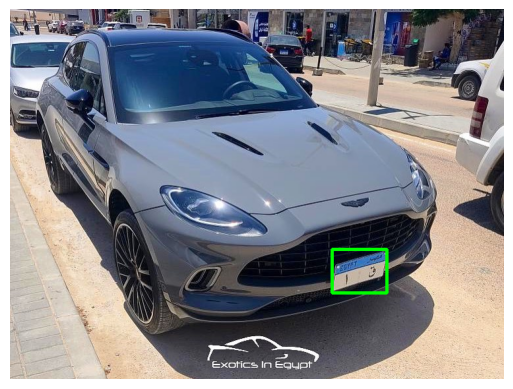

In [12]:
i = 100
filepath = images_path[i]
xmin = df.loc[i, 'xmin']
ymin = df.loc[i, 'ymin']
xmax = df.loc[i, 'xmax']
ymax = df.loc[i, 'ymax']

img = cv2.imread(filepath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)

plt.imshow(img)
plt.axis("off")
plt.show()

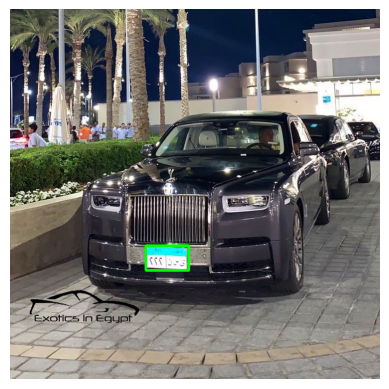

In [13]:
i = 200
filepath = images_path[i]
xmin = df.loc[i, 'xmin']
ymin = df.loc[i, 'ymin']
xmax = df.loc[i, 'xmax']
ymax = df.loc[i, 'ymax']

img = cv2.imread(filepath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)

plt.imshow(img)
plt.axis("off")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2024-04-01 22:01:59.851396: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 22:01:59.851490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 22:01:59.983267: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
df.head()

,file_path,xmin,ymin,xmax,ymax
0,/kaggle/input/car-plates-numbers/Car Plates Nu...,413,580,577,660
1,/kaggle/input/car-plates-numbers/Car Plates Nu...,316,744,553,920
2,/kaggle/input/car-plates-numbers/Car Plates Nu...,414,689,668,827
3,/kaggle/input/car-plates-numbers/Car Plates Nu...,432,566,615,657
4,/kaggle/input/car-plates-numbers/Car Plates Nu...,216,513,401,648


In [16]:
labels = df.iloc[:,1:].values

In [17]:
labels[:5]

array([[413, 580, 577, 660],
       [316, 744, 553, 920],
       [414, 689, 668, 827],
       [432, 566, 615, 657],
       [216, 513, 401, 648]])

In [18]:
data = []
output = []

for ind in range(len(images_path)):
    image_path = images_path[ind]
    img_arr = cv2.imread(image_path)
    h,w,d = img_arr.shape
    
    #preprocessing
    image = load_img(image_path , target_size = (CONFIG['IMAGE_SIZE'],CONFIG['IMAGE_SIZE']))
    image_array = img_to_array(image)
    norm_image_array = image_array /255.0
    
    
    #normalize labels 
    xmin ,ymin,xmax , ymax = labels[ind]
    xmin ,xmax = xmin /w ,xmax / w
    ymin , ymax = ymin/h , ymax/h
    label_norm = (xmin,xmax,ymin,ymax)
    
    #append
    data.append(norm_image_array)
    output.append(label_norm)

In [19]:
data[0]

array([[[0.08235294, 0.09019608, 0.14117648],
        [0.07058824, 0.07843138, 0.12941177],
        [0.07450981, 0.08235294, 0.13333334],
        ...,
        [0.1254902 , 0.1254902 , 0.16470589],
        [0.1254902 , 0.1254902 , 0.16470589],
        [0.12156863, 0.12156863, 0.16078432]],

       [[0.09019608, 0.09803922, 0.14901961],
        [0.08235294, 0.09019608, 0.14117648],
        [0.09019608, 0.09803922, 0.14901961],
        ...,
        [0.1254902 , 0.1254902 , 0.16470589],
        [0.1254902 , 0.1254902 , 0.16470589],
        [0.12156863, 0.12156863, 0.16078432]],

       [[0.08627451, 0.09411765, 0.14509805],
        [0.08627451, 0.09411765, 0.14509805],
        [0.08627451, 0.09411765, 0.14509805],
        ...,
        [0.1254902 , 0.1254902 , 0.16470589],
        [0.12941177, 0.12941177, 0.16862746],
        [0.1254902 , 0.1254902 , 0.16470589]],

       ...,

       [[0.5882353 , 0.4117647 , 0.32941177],
        [0.7529412 , 0.5921569 , 0.5137255 ],
        [0.54509807, 0

In [20]:
output[0]

(0.3824074074074074,
 0.5342592592592592,
 0.5370370370370371,
 0.6111111111111112)

In [21]:
X = np.array(data , dtype= np.float64)
y = np.array(output , dtype= np.float64)

In [22]:
X.shape , y.shape

((209, 224, 224, 3), (209, 4))

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
 X_train.shape, X_test.shape, y_train.shape, y_test.shape

((167, 224, 224, 3), (42, 224, 224, 3), (167, 4), (42, 4))

In [25]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Input , Dense, Flatten ,Dropout
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint ,ReduceLROnPlateau

In [26]:
inception_resnet_model = InceptionResNetV2(weights = 'imagenet' , include_top = False , input_tensor = Input(shape=(CONFIG['IMAGE_SIZE'],CONFIG['IMAGE_SIZE'],3)))
inception_resnet_model.trainable = False

headmodel = inception_resnet_model.output
headmodel = Flatten()(headmodel)
headmodel = Dense(512, activation="relu")(headmodel)
headmodel = Dense(256, activation="relu")(headmodel)
outputs = Dense(4, activation="sigmoid")(headmodel)

model = Model(inputs = inception_resnet_model.input , outputs = outputs )

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [27]:
lr_scheduler = ReduceLROnPlateau(factor=0.4, patience=2, min_lr=1e-10)

In [28]:
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=1)

In [29]:
model.compile(loss ='mse' , optimizer = Adam(learning_rate = 0.0001))

In [30]:
from tensorflow.keras.callbacks import TensorBoard

In [31]:
tfb = TensorBoard(log_dir="logs")

In [32]:
history = model.fit(x=X_train, y=y_train, batch_size=4, epochs=150, validation_data=(X_test, y_test), callbacks=[tfb, model_checkpoint,lr_scheduler])

Epoch 1/150


I0000 00:00:1712008978.097267      76 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712008978.193745      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 0.1076

W0000 00:00:1712009003.998921      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 0.06674, saving model to best_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 68s 905ms/step - loss: 0.1074 - val_loss: 0.0667 - learning_rate: 1.0000e-04
Epoch 2/150
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0768
Epoch 2: val_loss improved from 0.06674 to 0.04672, saving model to best_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0764 - val_loss: 0.0467 - learning_rate: 1.0000e-04
Epoch 3/150
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0509
Epoch 3: val_loss improved from 0.04672 to 0.04138, saving model to best_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0509 - val_loss: 0.0414 - learning_rate: 1.0000e-04
Epoch 4/150
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0427
Epoch 4: val_loss did not improve from 0.04138
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0427 - val_loss: 0.0428 - learning_rate: 1.0000e-04
Epoch 5/150
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0416
Epoch 5: val_loss imp

In [33]:
i = 33
filepath = images_path[i]
image = load_img(path= filepath)
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)

image1 = load_img(path=filepath, target_size=(CONFIG['IMAGE_SIZE'],CONFIG['IMAGE_SIZE']))
image_arr_224 = img_to_array(image1)/255.0 # convert into array and normalize output

(-0.5, 1079.5, 1349.5, -0.5)

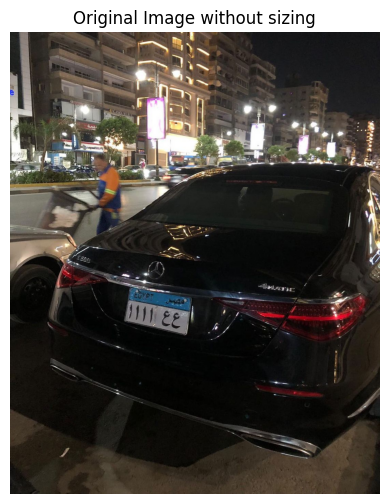

In [34]:
plt.figure(figsize=(8,6))
plt.imshow(image)
plt.title("Original Image without sizing")
plt.axis("off")

In [35]:

test_arr = image_arr_224.reshape(1,CONFIG['IMAGE_SIZE'],CONFIG['IMAGE_SIZE'],3)
test_arr.shape

(1, 224, 224, 3)

In [36]:
coords = model.predict(test_arr)
coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


array([[0.30836836, 0.49454588, 0.55290306, 0.6587154 ]], dtype=float32)

In [37]:
h,w,d = image.shape
denorm = np.array([w,w,h,h])
coords = coords * denorm

coords

array([[333.03782344, 534.10954714, 746.4191258 , 889.26582634]])

In [38]:
coords = coords.astype(np.int64)
coords

array([[333, 534, 746, 889]])

(333, 746) (534, 889)


(-0.5, 1079.5, 1349.5, -0.5)

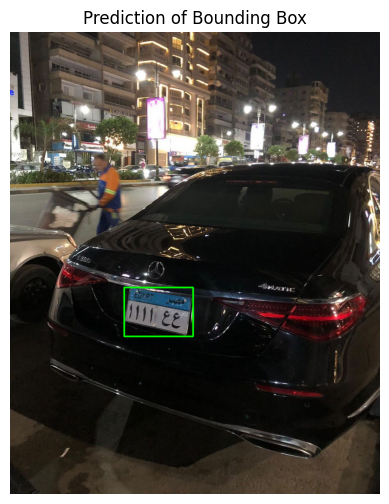

In [39]:
xmin, xmax, ymin, ymax = coords[0]

pt1 = (xmin, ymin)
pt2 = (xmax, ymax)

print(pt1, pt2)

cv2.rectangle(image, pt1, pt2, (0,255,0), 3)

plt.figure(figsize=(8,6))
plt.imshow(image)
plt.title("Prediction of Bounding Box")
plt.axis("off")

In [40]:
model.save('Car_Plates_number_model.h5')